In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report

  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


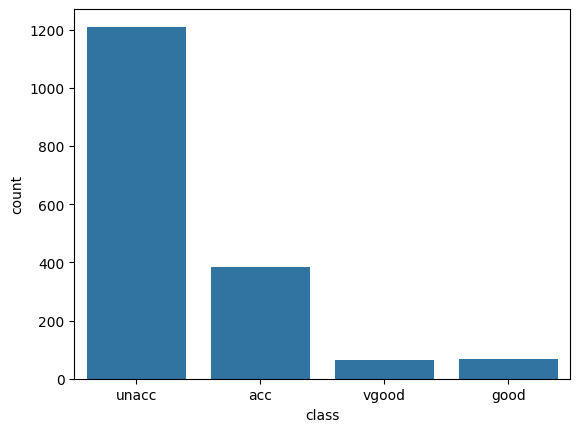

In [17]:
# Load the Car Evaluation dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"
column_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
car_data = pd.read_csv(url, names=column_names)

# Display the first five entries
print(car_data.head())

# Display a count of the classes
print(car_data['class'].value_counts())

# Visualize the count of classes
sns.countplot(x='class', data=car_data)
plt.show()

In [18]:
# Convert categorical features to numerical values
car_data['buying'] = car_data['buying'].map({'vhigh': 3, 'high': 2, 'med': 1, 'low': 0})
car_data['maint'] = car_data['maint'].map({'vhigh': 3, 'high': 2, 'med': 1, 'low': 0})
car_data['doors'] = car_data['doors'].map({'2': 2, '3': 3, '4': 4, '5more': 5})
car_data['persons'] = car_data['persons'].map({'2': 2, '4': 4, 'more': 6})
car_data['lug_boot'] = car_data['lug_boot'].map({'small': 0, 'med': 1, 'big': 2})
car_data['safety'] = car_data['safety'].map({'low': 0, 'med': 1, 'high': 2})
car_data['class'] = car_data['class'].map({'unacc': 0, 'acc': 1, 'good': 2, 'vgood': 3})


In [19]:
# Display the first five entries of the modified DataFrame
print(car_data.head())

# Obtain statistics of each feature
print(car_data.describe())

# Check for missing values
print(car_data.isnull().sum())

   buying  maint  doors  persons  lug_boot  safety  class
0       3      3      2        2         0       0      0
1       3      3      2        2         0       1      0
2       3      3      2        2         0       2      0
3       3      3      2        2         1       0      0
4       3      3      2        2         1       1      0
            buying        maint        doors      persons     lug_boot  \
count  1728.000000  1728.000000  1728.000000  1728.000000  1728.000000   
mean      1.500000     1.500000     3.500000     4.000000     1.000000   
std       1.118358     1.118358     1.118358     1.633466     0.816733   
min       0.000000     0.000000     2.000000     2.000000     0.000000   
25%       0.750000     0.750000     2.750000     2.000000     0.000000   
50%       1.500000     1.500000     3.500000     4.000000     1.000000   
75%       2.250000     2.250000     4.250000     6.000000     2.000000   
max       3.000000     3.000000     5.000000     6.000000   

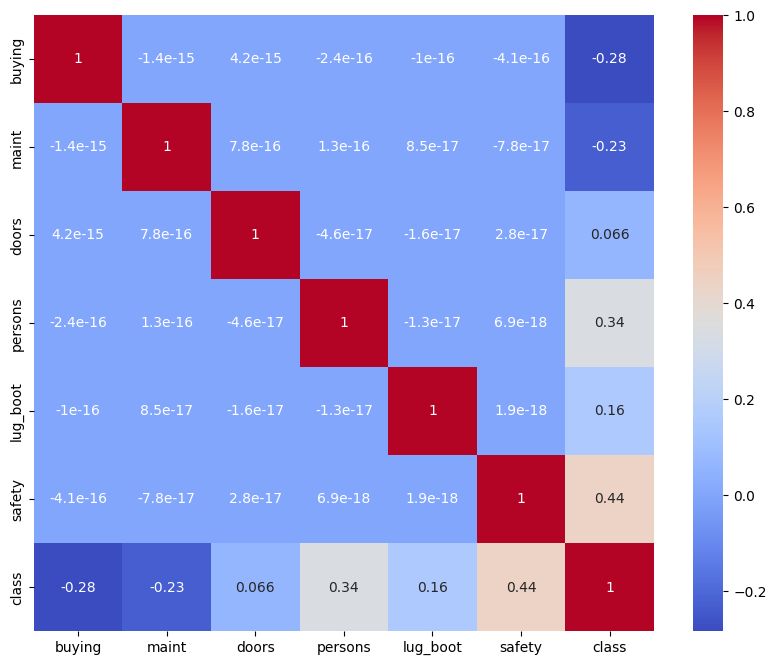

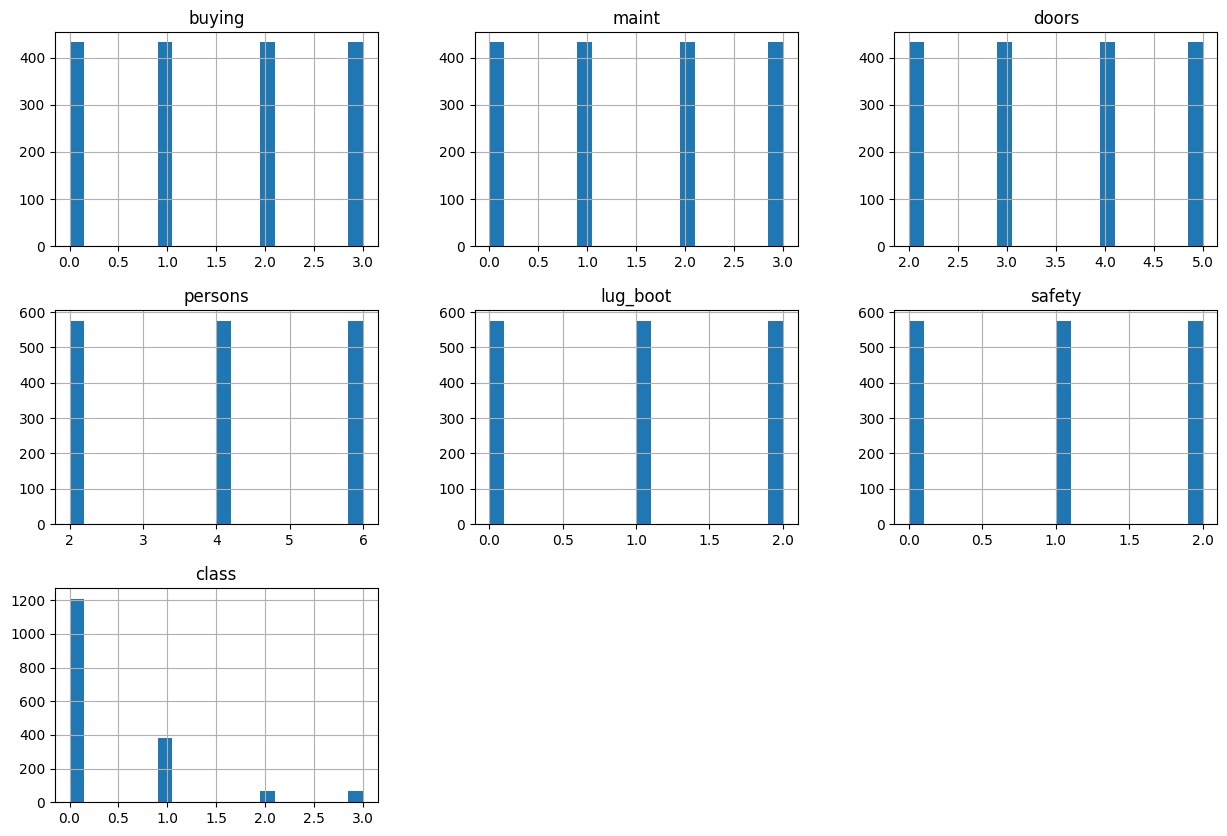

In [20]:
# Visualize correlation using heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(car_data.corr(), annot=True, cmap='coolwarm')
plt.show()

# Visualize the distribution of features
car_data.hist(bins=20, figsize=(15, 10))
plt.show()

In [15]:
# Split the data
X = car_data.drop(columns='class')
y = car_data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

# Instantiate the model
gnb = GaussianNB()

# Train the model
gnb.fit(X_train, y_train)

# Perform prediction on the first 10 samples
predictions = gnb.predict(X_test[:10])
print("Predictions:", predictions)
print("Ground Truth:", y_test[:10].values)

Predictions: [0 0 0 0 0 0 1 1 0 3]
Ground Truth: [0 0 0 0 2 0 1 1 0 1]


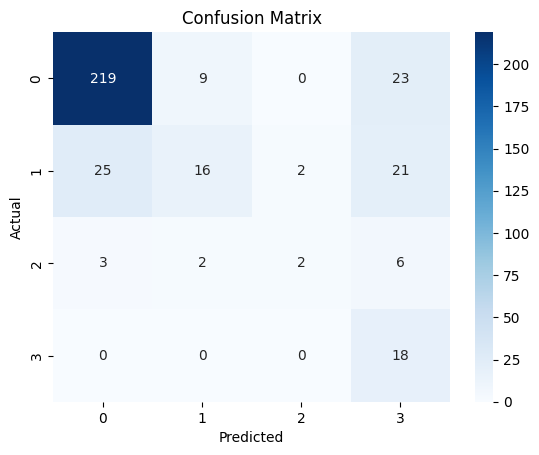

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       251
           1       0.59      0.25      0.35        64
           2       0.50      0.15      0.24        13
           3       0.26      1.00      0.42        18

    accuracy                           0.74       346
   macro avg       0.56      0.57      0.47       346
weighted avg       0.79      0.74      0.73       346



In [21]:
# Obtain the confusion matrix
conf_matrix = confusion_matrix(y_test, gnb.predict(X_test))

# Visualize the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
print(classification_report(y_test, gnb.predict(X_test)))

  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


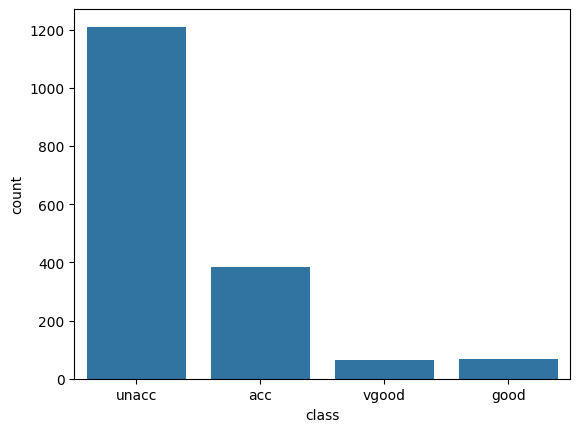

   buying  maint  doors  persons  lug_boot  safety  class
0       3      3      0        0         2       1      2
1       3      3      0        0         2       2      2
2       3      3      0        0         2       0      2
3       3      3      0        0         1       1      2
4       3      3      0        0         1       2      2
            buying        maint        doors      persons     lug_boot  \
count  1728.000000  1728.000000  1728.000000  1728.000000  1728.000000   
mean      1.500000     1.500000     1.500000     1.000000     1.000000   
std       1.118358     1.118358     1.118358     0.816733     0.816733   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.750000     0.750000     0.750000     0.000000     0.000000   
50%       1.500000     1.500000     1.500000     1.000000     1.000000   
75%       2.250000     2.250000     2.250000     2.000000     2.000000   
max       3.000000     3.000000     3.000000     2.000000   

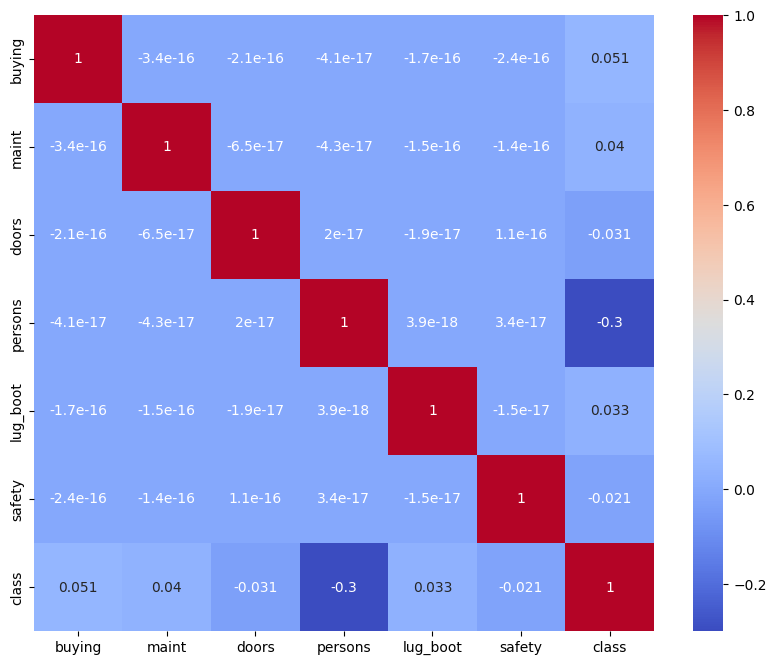

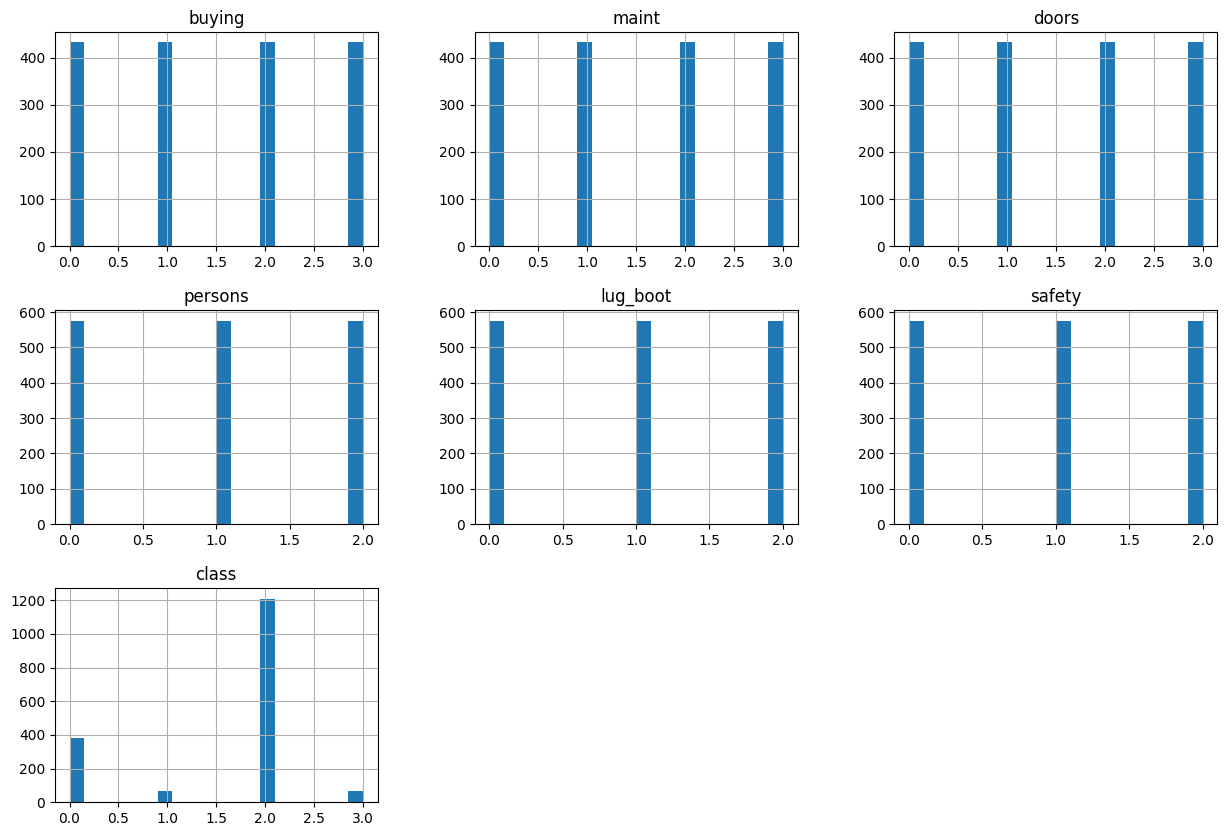

Predictions: [2 2 2 2 0 2 0 0 2 2]
Ground Truth: [2 2 2 2 1 2 0 0 2 0]


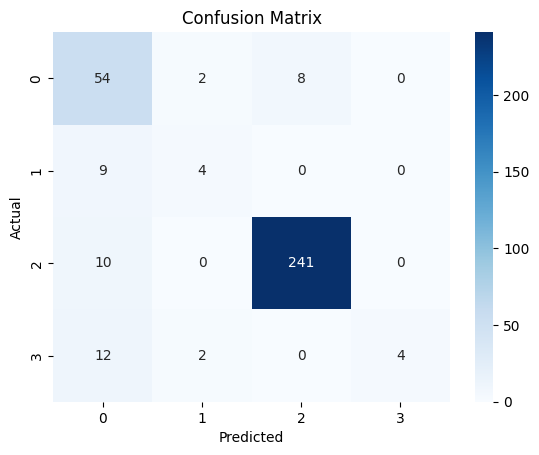

              precision    recall  f1-score   support

           0       0.64      0.84      0.72        64
           1       0.50      0.31      0.38        13
           2       0.97      0.96      0.96       251
           3       1.00      0.22      0.36        18

    accuracy                           0.88       346
   macro avg       0.78      0.58      0.61       346
weighted avg       0.89      0.88      0.87       346



In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import confusion_matrix, classification_report

# Load the Car Evaluation dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"
column_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
car_data = pd.read_csv(url, names=column_names)

# Display the first five entries
print(car_data.head())

# Display a count of the classes
print(car_data['class'].value_counts())

# Visualize the count of classes
sns.countplot(x='class', data=car_data)
plt.show()

# Convert categorical features to numerical values
car_data['buying'] = car_data['buying'].astype('category').cat.codes
car_data['maint'] = car_data['maint'].astype('category').cat.codes
car_data['doors'] = car_data['doors'].astype('category').cat.codes
car_data['persons'] = car_data['persons'].astype('category').cat.codes
car_data['lug_boot'] = car_data['lug_boot'].astype('category').cat.codes
car_data['safety'] = car_data['safety'].astype('category').cat.codes
car_data['class'] = car_data['class'].astype('category').cat.codes

# Display the first five entries of the modified DataFrame
print(car_data.head())

# Obtain statistics of each feature
print(car_data.describe())

# Check for missing values
print(car_data.isnull().sum())

# Visualize correlation using heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(car_data.corr(), annot=True, cmap='coolwarm')
plt.show()

# Visualize the distribution of features
car_data.hist(bins=20, figsize=(15, 10))
plt.show()

# Split the data
X = car_data.drop(columns='class')
y = car_data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

# Instantiate the model
cnb = CategoricalNB()

# Train the model
cnb.fit(X_train, y_train)

# Perform prediction on the first 10 samples
predictions = cnb.predict(X_test[:10])
print("Predictions:", predictions)
print("Ground Truth:", y_test[:10].values)

# Obtain the confusion matrix
conf_matrix = confusion_matrix(y_test, cnb.predict(X_test))

# Visualize the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
print(classification_report(y_test, cnb.predict(X_test)))


   PassengerId                                               Name  Pclass  \
0            1                            Braund, Mr. Owen Harris       3   
1            2  Cumings, Mrs. John Bradley (Florence Briggs Th...       1   
2            3                             Heikkinen, Miss. Laina       3   
3            4       Futrelle, Mrs. Jacques Heath (Lily May Peel)       1   
4            5                           Allen, Mr. William Henry       3   

   Gender   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  \
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S   
1  female  38.0      1      0          PC 17599  71.2833   C85        C   
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S   
3  female  35.0      1      0            113803  53.1000  C123        S   
4    male  35.0      0      0            373450   8.0500   NaN        S   

   Survived  
0         0  
1         1  
2         1  
3         1  
4         0  
  

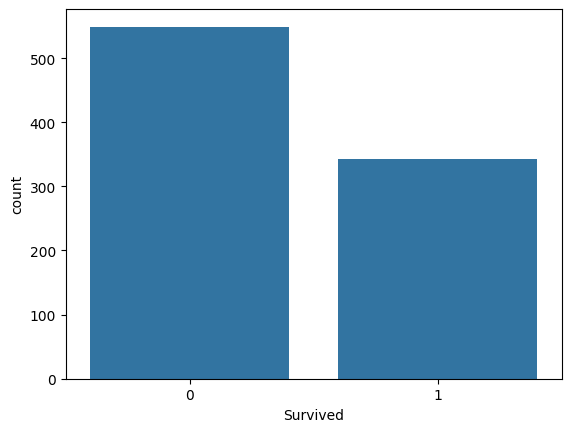

Gender
female    0.742038
male      0.188908
Name: Survived, dtype: float64
Pclass         1         2         3
Gender                              
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447


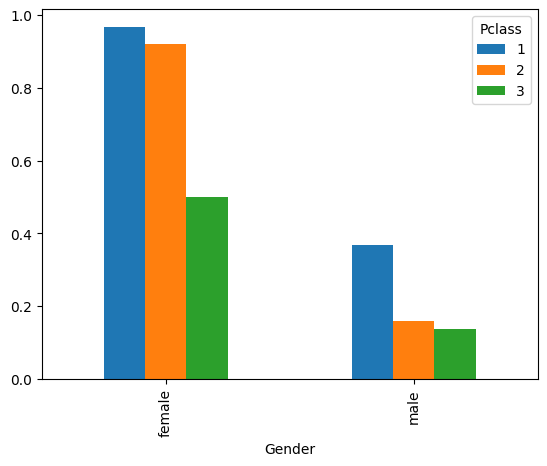

Gender  Age         Pclass
female  Child       1         0.000000
                    2         1.000000
                    3         0.478261
        Teen        1         1.000000
                    2         1.000000
                    3         0.550000
        Adult       1         0.972222
                    2         0.925000
                    3         0.500000
        Middle Age  1         0.972222
                    2         0.850000
                    3         0.142857
        Senior      1         1.000000
                    2              NaN
                    3         1.000000
male    Child       1         1.000000
                    2         1.000000
                    3         0.360000
        Teen        1         0.500000
                    2         0.000000
                    3         0.076923
        Adult       1         0.500000
                    2         0.074074
                    3         0.155844
        Middle Age  1         0.37037

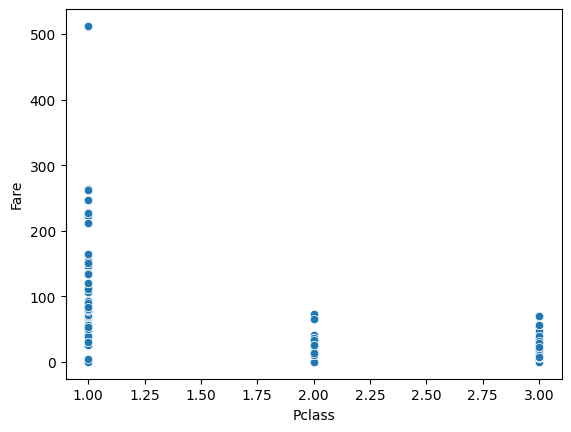

   Pclass  Gender         Age     Fare
0       3    male       Adult   7.2500
1       1  female  Middle Age  71.2833
2       3  female       Adult   7.9250
3       1  female       Adult  53.1000
4       3    male       Adult   8.0500
   Pclass     Fare  Gender_male  Age_Teen  Age_Adult  Age_Middle Age  \
0       3   7.2500         True     False       True           False   
1       1  71.2833        False     False      False            True   
2       3   7.9250        False     False       True           False   
3       1  53.1000        False     False       True           False   
4       3   8.0500         True     False       True           False   

   Age_Senior  
0       False  
1       False  
2       False  
3       False  
4       False  
           Pclass        Fare
count  891.000000  891.000000
mean     2.308642   32.204208
std      0.836071   49.693429
min      1.000000    0.000000
25%      2.000000    7.910400
50%      3.000000   14.454200
75%      3.000000   31.0000

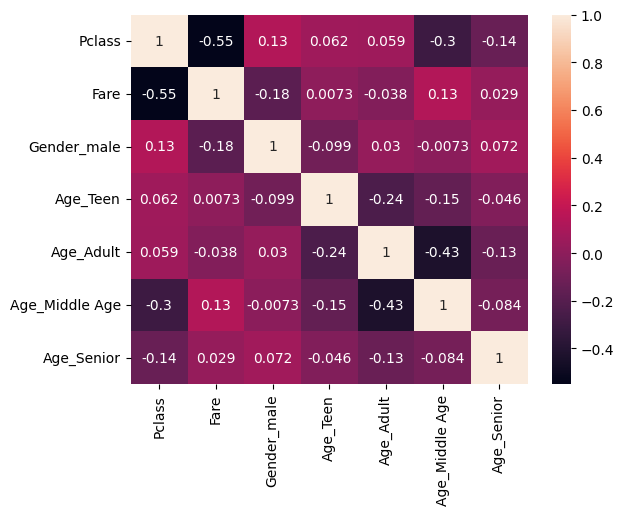

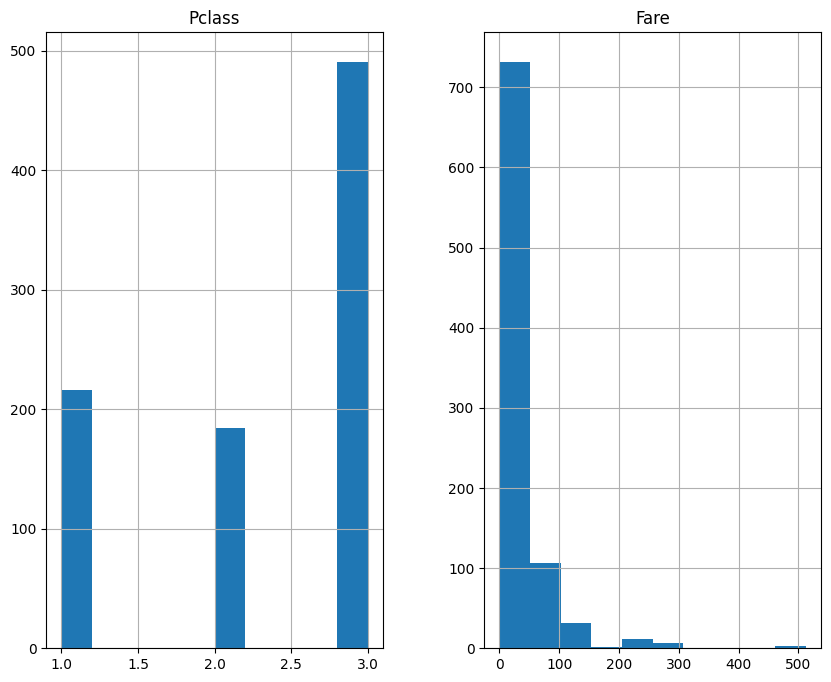

Predictions for first 10 samples: [0 0 0 1 1 0 0 0 0 0]
Ground truth for first 10 samples: [0 0 0 1 1 0 0 0 1 0]
Class probabilities for first 10 samples:
 [[9.44085512e-01 5.59144878e-02]
 [9.44058122e-01 5.59418783e-02]
 [9.44353528e-01 5.56464724e-02]
 [1.33952122e-04 9.99866048e-01]
 [1.47272253e-02 9.85272775e-01]
 [9.44353528e-01 5.56464724e-02]
 [9.44270721e-01 5.57292795e-02]
 [8.83051234e-01 1.16948766e-01]
 [9.44339687e-01 5.56603125e-02]
 [9.44353528e-01 5.56464724e-02]]


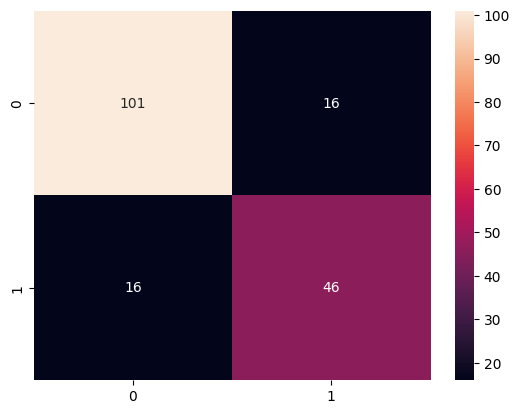

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       117
           1       0.74      0.74      0.74        62

    accuracy                           0.82       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.82      0.82      0.82       179

Categorical Naïve Bayes Accuracy: 0.8212290502793296
Confusion Matrix:
 [[104  13]
 [ 19  43]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87       117
           1       0.77      0.69      0.73        62

    accuracy                           0.82       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.82      0.82      0.82       179

Gaussian Naïve Bayes Accuracy: 0.8212290502793296
Categorical Naïve Bayes Accuracy: 0.8212290502793296


In [22]:
# Step 1: Load the Titanic dataset into a data frame
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Load dataset
df = pd.read_csv('titanic.csv')

# Step 2: Visualize the first five entries of the data frame
print(df.head())

# Step 3: Drop the following irrelevant features
df = df.drop(columns=['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'])

# Step 4: Visualize the first five entries of the modified data frame
print(df.head())

# Step 5: Display a count of the survivors
print(df['Survived'].value_counts())

# Step 6: Visualize the count of survivors using "countplot" of Seaborn
sns.countplot(x='Survived', data=df)
plt.show()

# Step 7: Obtain the survival rate by "Gender" using "groupby" function of Pandas
print(df.groupby('Gender')['Survived'].mean())

# Step 8: Obtain the survival rate by "Gender" and "Pclass" using "pivot_table" function of Pandas
survival_rate = df.pivot_table('Survived', index='Gender', columns='Pclass')
print(survival_rate)

# Step 9: Visualize the output of (8) using "plot.bar" function of Pandas
survival_rate.plot.bar()
plt.show()

# Step 10: Obtain the survival rate by "Gender", "Age" and "Pclass"
# Step 11: Need to first discretize "Age" using "cut" function of Pandas
df['Age'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 100], labels=['Child', 'Teen', 'Adult', 'Middle Age', 'Senior'])
print(df.groupby(['Gender', 'Age', 'Pclass'])['Survived'].mean())

# Step 12: Use a scatter plot to visualize the "Fare" paid for each "Pclass"
sns.scatterplot(x='Pclass', y='Fare', data=df)
plt.show()

# Step 13: Drop the class variable from the data frame and save it in a different variable
X = df.drop(columns='Survived')
y = df['Survived']

# Step 14: Visualize the first five entries of the modified data frame
print(X.head())

# Step 15: Convert any features having categorical values to numerical values
X = pd.get_dummies(X, drop_first=True)

# Step 16: Visualize the first five entries of the modified data frame
print(X.head())

# Step 17: Obtain statistics of each feature using the "describe" function of Pandas
print(X.describe())

# Step 18: Check if any feature contains missing values
print(X.isnull().sum())

# Step 19: Fill the missing values with the mean of the feature values
X = X.fillna(X.mean())

# Step 20: Visualize correlation (Pearson) between features using the heatmap of Seaborn
sns.heatmap(X.corr(), annot=True)
plt.show()

# Step 21: Visualize the distribution of features having continuous values using histogram plot of Seaborn
X.hist(figsize=(10, 8))
plt.show()

# Step 22: Split the dataset such that 20% of the data falls in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Step 23: Implement a Gaussian Naïve Bayes model
gnb = GaussianNB()

# Step 24: Train the model using the training data
gnb.fit(X_train, y_train)

# Step 25: Predict the class label for the first 10 samples in the test data and compare with ground truth
y_pred = gnb.predict(X_test[:10])
print("Predictions for first 10 samples:", y_pred)
print("Ground truth for first 10 samples:", y_test[:10].values)

# Step 26: Predict the class probabilities for the first 10 samples in the test data
y_prob = gnb.predict_proba(X_test[:10])
print("Class probabilities for first 10 samples:\n", y_prob)

# Step 27: Obtain and visualize the confusion matrix
y_pred = gnb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

# Step 28: Obtain and visualize the classification report
print(classification_report(y_test, y_pred))

# Step 29: Repeat the above procedure using "Categorical" Naïve Bayes model
# Note: CategoricalNB is used for categorical data only, let's focus on discrete features
# We will assume 'Age', 'Gender_male', 'Pclass' are categorical

# Prepare data for CategoricalNB (convert features to categorical)
X_cat = df[['Gender', 'Pclass', 'Age']].copy()
X_cat = pd.get_dummies(X_cat, drop_first=True)
y_cat = df['Survived']

# Split the dataset
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X_cat, y_cat, test_size=0.2, random_state=10)

# Train the model
cnb = CategoricalNB()
cnb.fit(X_train_cat, y_train_cat)

# Predictions
y_pred_cat = cnb.predict(X_test_cat)

# Evaluation
print("Categorical Naïve Bayes Accuracy:", accuracy_score(y_test_cat, y_pred_cat))
print("Confusion Matrix:\n", confusion_matrix(y_test_cat, y_pred_cat))
print("Classification Report:\n", classification_report(y_test_cat, y_pred_cat))

# Step 30: Predict the first discrete all-features having continuous values
# Already covered in GaussianNB

# Step 31: Compare the accuracy of all with and equal frequency methods
# Step 32: Compare the Gaussian and Categorical Naïve Bayes models
print("Gaussian Naïve Bayes Accuracy:", accuracy_score(y_test, y_pred))
print("Categorical Naïve Bayes Accuracy:", accuracy_score(y_test_cat, y_pred_cat))

# Step 33: Any changes in accuracy? Which one is improved?


  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc
  buying  maint doors persons lug_boot safety
0  vhigh  vhigh     2       2    small    low
1  vhigh  vhigh     2       2    small    med
2  vhigh  vhigh     2       2    small   high
3  vhigh  vhigh     2       2      med    low
4  vhigh  vhigh     2       2      med    med
   buying  maint  doors  persons  lug_boot  safety
0       3      3      0        0         2       1
1       3      3      0        0         2       2
2       3      3      0        0         2       0
3       3      3      0        0         1       1
4       3      3      0        0         1       2
            buying        maint        doors      persons     lug_boot  \
count  1728.000000  1728.0

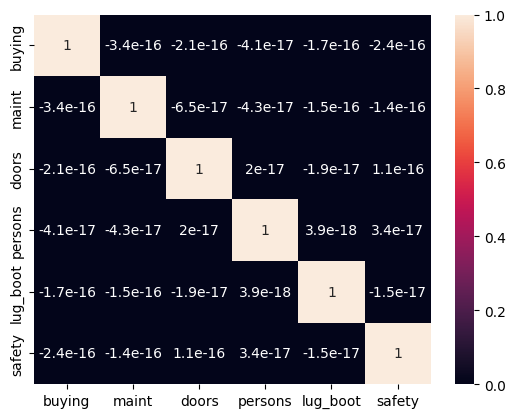

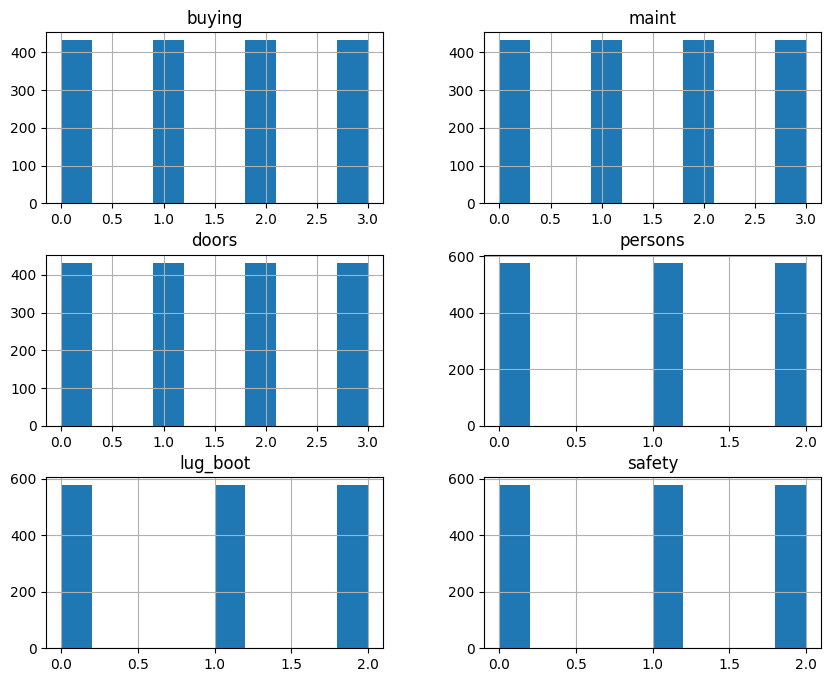

Predictions for first 10 samples: [2 2 2 3 2 2 0 3 2 3]
Ground truth for first 10 samples: [2 2 2 2 1 2 0 0 2 0]
Class probabilities for first 10 samples:
 [[1.53518553e-01 4.23716508e-04 8.46057731e-01 0.00000000e+00]
 [9.40697229e-03 3.59985362e-06 9.90589428e-01 0.00000000e+00]
 [3.38152687e-01 1.21783506e-02 6.49668963e-01 0.00000000e+00]
 [6.04134792e-03 1.96779258e-07 4.86702470e-01 5.07255986e-01]
 [2.54874919e-01 1.06636827e-01 6.38488255e-01 0.00000000e+00]
 [3.78227741e-01 2.34501745e-03 6.19427241e-01 0.00000000e+00]
 [5.30698538e-01 2.17668138e-02 4.47534648e-01 0.00000000e+00]
 [2.79221113e-03 6.56794707e-06 6.13522941e-03 9.91065992e-01]
 [4.46675805e-01 9.47081481e-05 5.53229487e-01 0.00000000e+00]
 [3.86958218e-02 1.52146713e-04 1.16829329e-01 8.44322702e-01]]


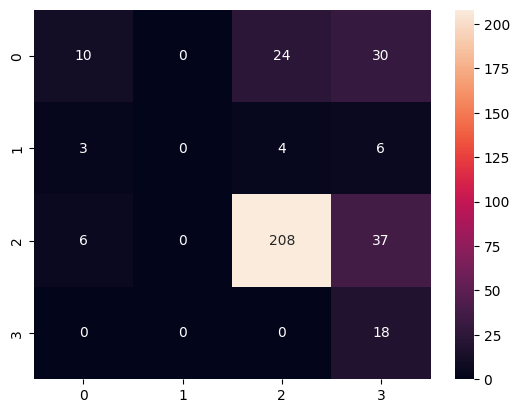

              precision    recall  f1-score   support

           0       0.53      0.16      0.24        64
           1       0.00      0.00      0.00        13
           2       0.88      0.83      0.85       251
           3       0.20      1.00      0.33        18

    accuracy                           0.68       346
   macro avg       0.40      0.50      0.36       346
weighted avg       0.75      0.68      0.68       346

Categorical Naïve Bayes Accuracy: 0.8757225433526011
Confusion Matrix:
 [[ 54   2   8   0]
 [  9   4   0   0]
 [ 10   0 241   0]
 [ 12   2   0   4]]
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.84      0.72        64
           1       0.50      0.31      0.38        13
           2       0.97      0.96      0.96       251
           3       1.00      0.22      0.36        18

    accuracy                           0.88       346
   macro avg       0.78      0.58      0.61       346
weighted avg

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
# Step 1: Load the Car Evaluation dataset into a data frame
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df = pd.read_csv(url, names=columns)

# Step 2: Visualize the first five entries of the data frame
print(df.head())

# Step 3: Drop the class variable from the data frame and save it in a different variable
X = df.drop(columns='class')
y = df['class']

# Step 4: Visualize the first five entries of the modified data frame
print(X.head())

# Step 5: Convert any features having categorical values to numerical values
le = LabelEncoder()
for col in X.columns:
    X[col] = le.fit_transform(X[col])

# Encode the target variable
y = le.fit_transform(y)

# Step 6: Visualize the first five entries of the modified data frame
print(X.head())

# Step 7: Obtain statistics of each feature using the "describe" function of Pandas
print(X.describe())

# Step 8: Check if any feature contains missing values
print(X.isnull().sum())

# Step 9: Fill the missing values with the mean of the feature values
# (No missing values in this dataset)

# Step 10: Visualize correlation (Pearson) between features using the heatmap of Seaborn
sns.heatmap(X.corr(), annot=True)
plt.show()

# Step 11: Visualize the distribution of features having continuous values using histogram plot of Seaborn
X.hist(figsize=(10, 8))
plt.show()

# Step 12: Split the dataset such that 20% of the data falls in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Step 13: Implement a Gaussian Naïve Bayes model
gnb = GaussianNB()

# Step 14: Train the model using the training data
gnb.fit(X_train, y_train)

# Step 15: Predict the class label for the first 10 samples in the test data and compare with ground truth
y_pred = gnb.predict(X_test[:10])
print("Predictions for first 10 samples:", y_pred)
print("Ground truth for first 10 samples:", y_test[:10])

# Step 16: Predict the class probabilities for the first 10 samples in the test data
y_prob = gnb.predict_proba(X_test[:10])
print("Class probabilities for first 10 samples:\n", y_prob)

# Step 17: Obtain and visualize the confusion matrix
y_pred = gnb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

# Step 18: Obtain and visualize the classification report
print(classification_report(y_test, y_pred))

# Step 19: Repeat the above procedure using "Categorical" Naïve Bayes model
# Note: CategoricalNB is used for categorical data only, the dataset is already categorical

# Prepare data for CategoricalNB
cnb = CategoricalNB()
cnb.fit(X_train, y_train)

# Predictions
y_pred_cat = cnb.predict(X_test)

# Evaluation
print("Categorical Naïve Bayes Accuracy:", accuracy_score(y_test, y_pred_cat))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_cat))
print("Classification Report:\n", classification_report(y_test, y_pred_cat))

# Step 20: Predict the first discrete all-features having continuous values
# Already covered in GaussianNB

# Step 21: Compare the accuracy of all with and equal frequency methods
# Step 22: Compare the Gaussian and Categorical Naïve Bayes models
print("Gaussian Naïve Bayes Accuracy:", accuracy_score(y_test, y_pred))
print("Categorical Naïve Bayes Accuracy:", accuracy_score(y_test, y_pred_cat))

# Step 23: Any changes in accuracy? Which one is improved?
